In [7]:
# Performed as a part of curriculum at Great Learning

%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

c:\users\siddhartha borpuzari\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df=pd.read_csv('SAheart.csv')
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    object 
dtypes: float64(5), int64(3), object(2)
memory usage: 36.2+ KB


In [6]:
df.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

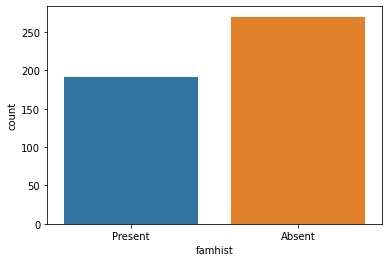

In [8]:
sns.countplot(df['famhist'])
plt.show()

In [9]:
df.famhist.replace(['Absent', 'Present'], [0,1], inplace = True)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sbp,462.0,138.326840,20.496317,101.00,124.0000,134.000,148.0000,218.00
tobacco,462.0,3.635649,4.593024,0.00,0.0525,2.000,5.5000,31.20
ldl,462.0,4.740325,2.070909,0.98,3.2825,4.340,5.7900,15.33
adiposity,462.0,25.406732,7.780699,6.74,19.7750,26.115,31.2275,42.49
famhist,462.0,0.415584,0.493357,0.00,0.0000,0.000,1.0000,1.00
typea,462.0,53.103896,9.817534,13.00,47.0000,53.000,60.0000,78.00
obesity,462.0,26.044113,4.213680,14.70,22.9850,25.805,28.4975,46.58
alcohol,462.0,17.044394,24.481059,0.00,0.5100,7.510,23.8925,147.19
age,462.0,42.816017,14.608956,15.00,31.0000,45.000,55.0000,64.00


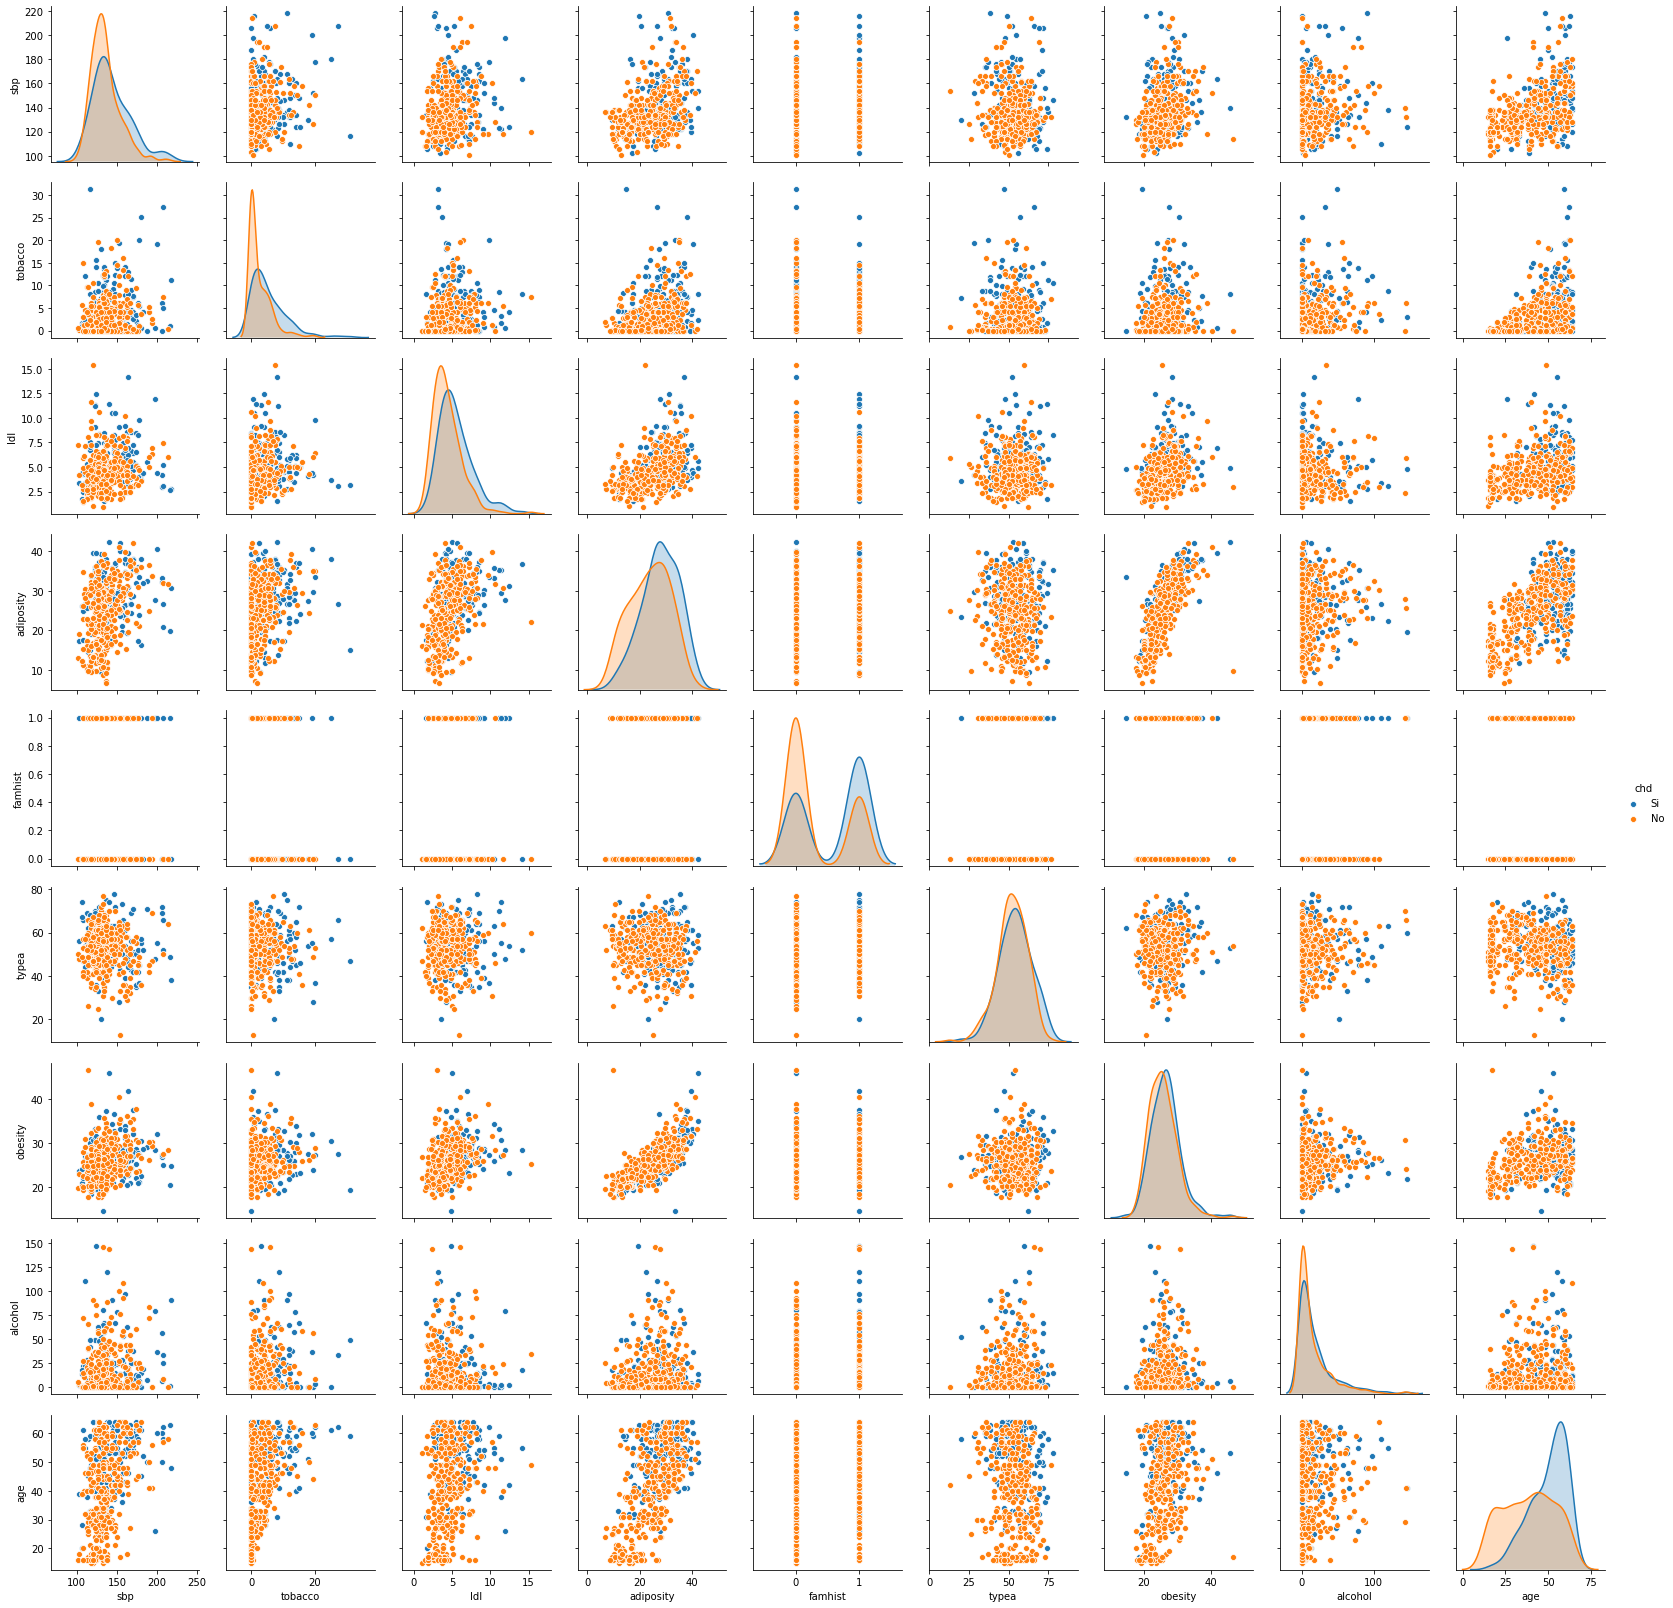

In [12]:
sns.pairplot(df, diag_kind= 'kde', hue = 'chd')
plt.show()

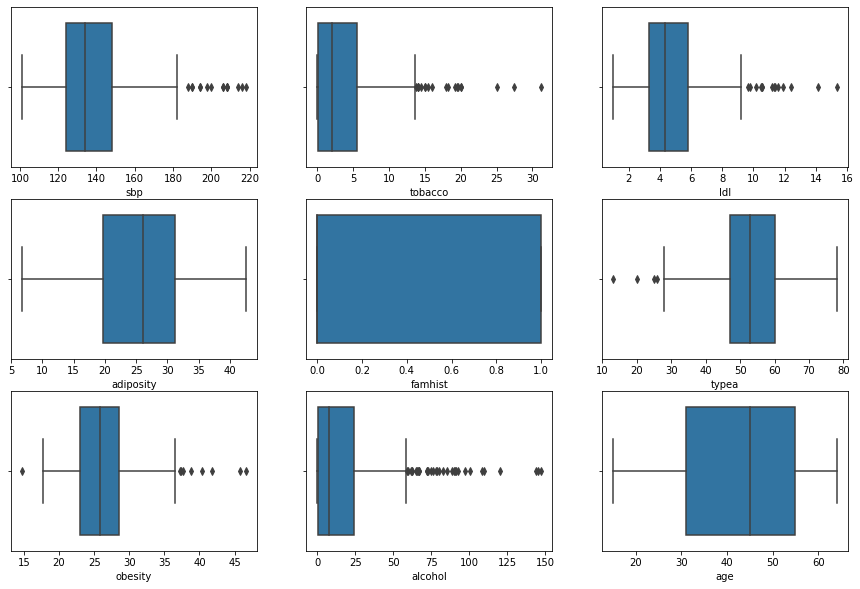

In [14]:
# Outlier check
plt.figure(figsize=(15,10))
pos = 1
for i in df.drop(columns = 'chd').columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(df[i])
    pos += 1 

In [15]:
X = df.drop(columns= 'chd')
y = df.chd

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((369, 9), (93, 9), (369,), (93,))

In [17]:
for i in X_train.columns:
    q1, q2, q3 = X_train[i].quantile([0.25,0.5,0.75])
    IQR = q3 - q1
    a = X_train[i] > q3 + 1.5*IQR
    b = X_train[i] < q1 - 1.5*IQR
    

    X_train[i] = np.where(a | b, q2, X_train[i])  

c:\users\siddhartha borpuzari\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


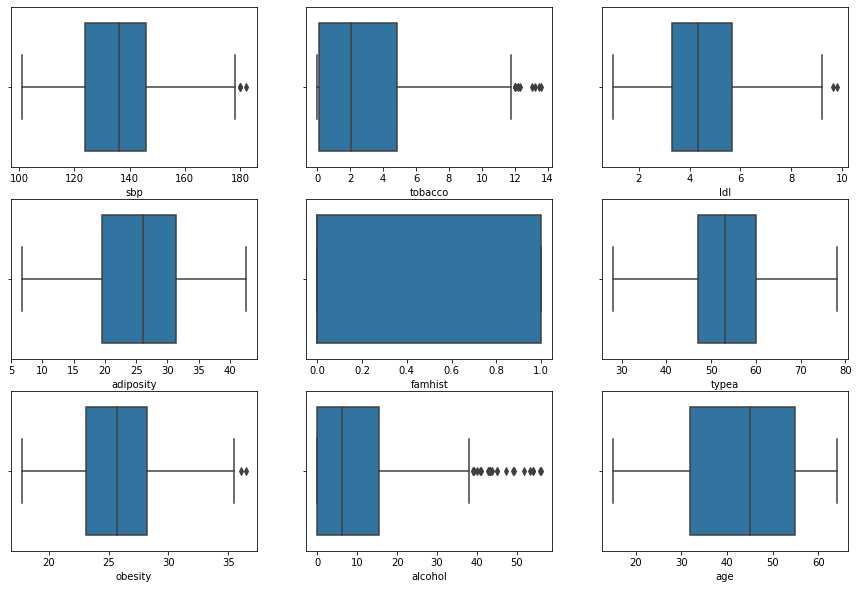

In [20]:
# Reducing outliers

plt.figure(figsize=(15,10))
pos = 1
for i in X_train.columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(X_train[i])
    pos += 1 

In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

c:\users\siddhartha borpuzari\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
from sklearn.metrics import confusion_matrix

pred = logreg.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()

lr_score = logreg.score(X_test, y_test)
lr_recall = round(tp/(tp+fn), 3)   
lr_precision = round(tp/(tp+fp), 3)
lr_specificity =round(tn/(tn+fp),3)

result = pd.DataFrame({'Model' : ['Logistic Regression'], 'Accuracy' : [lr_score], 'Precision' : [lr_precision],
                      'True positive rate' : [lr_recall], 'True negative rate' : [lr_specificity],
                       'False positive rate' :  [1-lr_specificity]})
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.752688,0.68,0.531,0.869,0.131


In [23]:
y_train.value_counts()

No    241
Si    128
Name: chd, dtype: int64

In [26]:
train = pd.concat([X_train, y_train], axis = 1)

extra_samples = train[train['chd'] == 'Si'].sample(n = 100, random_state = 1)

train_upsampled = pd.concat([train, extra_samples], axis = 0)

In [32]:
X_train = train_upsampled.drop(columns = 'chd')
y_train = train_upsampled.chd

X_train.shape

y_train.value_counts()

No    241
Si    228
Name: chd, dtype: int64

In [33]:
logreg = LogisticRegression(solver='liblinear', random_state=0)

logreg.fit(X_train, y_train)

pred = logreg.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()

lr_score = logreg.score(X_test, y_test)
lr_recall = round(tp/(tp+fn), 3)   # Of all the people with Chd, how many were recognised to have Chd
lr_precision = round(tp/(tp+fp), 3)  # Of all the people predicted to have Chd, how many did have Chd
lr_specificity =round(tn/(tn+fp),3)    # Of all the people without Chds, how many were recognised to not have Chd

result = pd.DataFrame({'Model' : ['Logistic Regression'], 'Accuracy' : [lr_score], 'Precision' : [lr_precision],
                      'True positive rate' : [lr_recall], 'True negative rate' : [lr_specificity],
                       'False positive rate' :  [1-lr_specificity]})
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.752688,0.615,0.75,0.754,0.246


In [34]:
# The accuracy remains same but TP rate increases 

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

pred = dt.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

dt_score = dt.score(X_test, y_test)
dt_recall = round(tp/(tp+fn), 3)   
dt_precision = round(tp/(tp+fp), 3)  
dt_specificity =round(tn/(tn+fp),3)  

result.loc[2] = ['Decision Tree', dt_score, dt_precision, dt_recall, dt_specificity, 1-dt_specificity]
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.752688,0.615,0.750,0.754,0.246
2,Decision Tree,0.612903,0.417,0.312,0.770,0.230


In [37]:
# Lets change the max depth

dt = DecisionTreeClassifier(max_depth= 4, random_state=1)

dt.fit(X_train, y_train)

pred = dt.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

dt_score = dt.score(X_test, y_test)
dt_recall = round(tp/(tp+fn), 3)   
dt_precision = round(tp/(tp+fp), 3)  
dt_specificity =round(tn/(tn+fp),3)  

result.loc[2] = ['Decision Tree', dt_score, dt_precision, dt_recall, dt_specificity, 1-dt_specificity]
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.752688,0.615,0.750,0.754,0.246
2,Decision Tree,0.741935,0.618,0.656,0.787,0.213


In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)

rf.fit(X_train, y_train)

pred = rf.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

rf_score = rf.score(X_test, y_test)
rf_recall = round(tp/(tp+fn), 3)   # Of all the people with Chd, how many were recognised to have Chd
rf_precision = round(tp/(tp+fp), 3)  # Of all the people predicted to have Chd, how many did have Chd
rf_specificity =round(tn/(tn+fp),3) 

result.loc[3] = ['Random Forest', rf_score, rf_precision, rf_recall, rf_specificity, 1 - rf_specificity]
result

c:\users\siddhartha borpuzari\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.752688,0.615,0.750,0.754,0.246
2,Decision Tree,0.741935,0.618,0.656,0.787,0.213
3,Random Forest,0.698925,0.611,0.344,0.885,0.115


In [39]:
from sklearn.model_selection import GridSearchCV

grid = {'bootstrap': [True, False],
         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_leaf': [1, 2, 4],
         'min_samples_split': [2, 5, 10],
         'n_estimators': [200, 400, 600]}

rf = RandomForestClassifier(random_state=1)

gs = GridSearchCV(estimator = rf, param_grid = grid, cv = 10, n_jobs = -1, verbose = 2 )

gs.fit(X_train, y_train)

gs.best_params_


Fitting 10 folds for each of 1188 candidates, totalling 11880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 9097 tasks      | e

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [40]:
gs.best_score_

0.8528784648187633

In [41]:
forest = RandomForestClassifier( bootstrap = False,
  max_depth = 20,
  max_features =  'auto' ,
  min_samples_leaf = 1,
  min_samples_split = 2,
  n_estimators = 200, random_state= 1)

forest.fit(X_train, y_train)

pred = forest.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

forest_score = forest.score(X_test, y_test)
forest_recall = round(tp/(tp+fn), 3)   
forest_precision = round(tp/(tp+fp), 3)
forest_specificity =round(tn/(tn+fp),3) 

result.loc[4] = ['Random forest(tuned)', forest_score, forest_precision, forest_recall, forest_specificity, 1 - forest_specificity]
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.752688,0.615,0.750,0.754,0.246
2,Decision Tree,0.741935,0.618,0.656,0.787,0.213
3,Random Forest,0.698925,0.611,0.344,0.885,0.115
4,Random forest(tuned),0.688172,0.588,0.312,0.885,0.115


In [42]:
# No improvement in score

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 3, n_jobs=1000)

knn.fit(X_train, y_train)


pred = knn.predict(X_test)


tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

knn_score = knn.score(X_test, y_test)
knn_recall = round(tp/(tp+fn), 3)   # Of all the people with Chd, how many were recognised to have Chd
knn_precision = round(tp/(tp+fp), 3)  # Of all the people predicted to have Chd, how many did have Chd
knn_specificity =round(tn/(tn+fp),3) 


result.loc[5] = ['knn', knn_score, knn_precision, knn_recall, knn_specificity, 1 - knn_specificity]
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.752688,0.615,0.750,0.754,0.246
2,Decision Tree,0.741935,0.618,0.656,0.787,0.213
3,Random Forest,0.698925,0.611,0.344,0.885,0.115
4,Random forest(tuned),0.688172,0.588,0.312,0.885,0.115
7,knn,0.602151,0.453,0.750,0.525,0.475
5,knn,0.602151,0.453,0.750,0.525,0.475


In [44]:
from sklearn.model_selection import GridSearchCV

grid = {'n_neighbors': [2,3,4,5,6,7]}

knn = KNeighborsClassifier()

gs = GridSearchCV(estimator = knn, param_grid = grid, cv = 10, n_jobs = -1, verbose = 2 )

gs.fit(X_train, y_train)

gs.best_params_

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  60 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.2s finished
c:\users\siddhartha borpuzari\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 5}

In [46]:
knn = gs.best_estimator_
pred = knn.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

knn_score = knn.score(X_test, y_test)
knn_recall = round(tp/(tp+fn), 3)   
knn_precision = round(tp/(tp+fp), 3)
knn_specificity =round(tn/(tn+fp),3) 


result.loc[7] = ['knn_gs', knn_score, knn_precision, knn_recall, knn_specificity, 1 - knn_specificity]
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.752688,0.615,0.750,0.754,0.246
2,Decision Tree,0.741935,0.618,0.656,0.787,0.213
3,Random Forest,0.698925,0.611,0.344,0.885,0.115
4,Random forest(tuned),0.688172,0.588,0.312,0.885,0.115
7,knn_gs,0.645161,0.489,0.688,0.623,0.377
5,knn,0.602151,0.453,0.750,0.525,0.475
